##Download Datasets from Kaggle

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!rm -rf data

In [ ]:
! kaggle datasets list

ref                                                                   title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data        Online Sales Dataset - Popular Marketplace Data     7KB  2024-05-25 23:55:26           6228        118  1.0              
rabieelkharoua/cancer-prediction-dataset                              🩺📊 Cancer Prediction Dataset 🌟🔬                    47KB  2024-06-10 03:54:18           1300         28  1.0              
mexwell/pizza-sales                                                   🍕 Pizza Sales                                     586KB  2024-06-06 07:18:22           1559         29  1.0              
informrohit1/smartphones-dataset        

In [ ]:
!kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

Dataset URL: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
License(s): CC0-1.0
 20% 5.00M/24.5M [00:00<00:00, 28.8MB/s]
100% 24.5M/24.5M [00:00<00:00, 97.1MB/s]


##Import Library

In [ ]:
! pip install tensorflow===2.9.0

In [ ]:
import pandas as pd
import seaborn as sns
import joblib
import os
import tkinter as tk
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from tkinter import messagebox
from tkinter import filedialog
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.0


##Extra Zip File

In [ ]:
local_zip = 'human-activity-recognition-with-smartphones.zip'
target_extraction = '/content/drive/MyDrive/Model'
file_check = "dataset"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)

except FileNotFoundError:
    print('Zip File Not Found!')

##Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Model/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Model/test.csv")

##Dataset Information

In [ ]:
#Display Top 5 Rows of The Dataset
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
#Check Last Rows of The Dataset
df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [ ]:
df.shape

(7352, 563)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


##Cleaning Data

In [ ]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

##Taking Duplicate Values

In [ ]:
df.duplicated().any()

False

In [ ]:
duplicated_columns = df.columns[df.T.duplicated()].tolist()

In [ ]:
len(duplicated_columns)

21

In [ ]:
data = df.drop(duplicated_columns,axis=1)

In [ ]:
df.shape

(7352, 563)

##Visualisasi

<ipython-input-21-cbf6486810c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Activity'], palette='Set3')


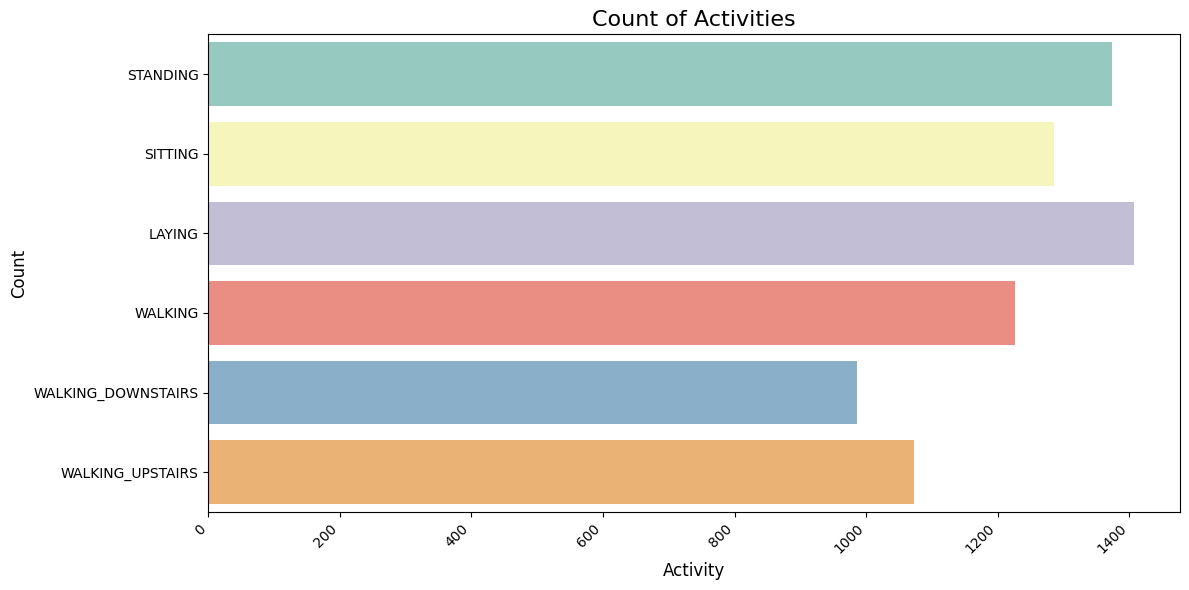

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data['Activity'], palette='Set3')
plt.title('Count of Activities', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Features Target

In [ ]:
X = data.drop('Activity',axis=1)
y= data['Activity']
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

##Split Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

##Logistik Regression

In [ ]:
log  = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9789259007477906

##Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.981645139360979

##Feature Selection

**Filter Method**






In [ ]:
k=200
selector = SelectKBest(f_classif,k=k)
X_train_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)


selected_indices=selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print(len(selected_features))

200


**Wrapper Method**

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
k=100
rfe_selector = RFE(estimator,n_features_to_select=k)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected,y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = selected_features[selected_indices_rfe]
print(selected_features_rfe)

Index(['tBodyAcc-std()-X', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'tBodyAcc-energy()-X', 'tBodyAcc-entropy()-X', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y',
       'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tBodyAccJerk-std()-X',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X',
       'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X',
       'tBodyAccJerk-max()-Y', 'tBodyAccJerk-max()-Z', 'tBodyAccJerk-sma()',
       'tBodyAccJerk-energy()-X', 'tBodyAccJerk-energy()-Y',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Z',
       'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z',
       'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z',
       'tBodyGyro-max()-X', 'tBodyGyro-min()-X', 'tBodyGyro-iqr()-X',
       'tBodyGyro-iqr()-Y', 'tBodyGyro-iqr()-Z', 'tBodyGyroJerk-std()-X',

In [ ]:
print(len(selected_features_rfe))

100


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_selected_rfe,y_train)
y_pred_rf = rf.predict(X_test_selected_rfe)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9768864717878993

In [ ]:
joblib.dump(rf,"model_rfe")

['model_rfe']

In [ ]:
joblib.dump(selector,"k_best_selector")

['k_best_selector']

In [ ]:
joblib.dump(rfe_selector,"rfe_selector")

['rfe_selector']

In [ ]:
df_test=df_test.drop("Activity",axis=1)

In [ ]:
duplicated_columns = df_test.columns[df_test.T.duplicated()].to_list()
df_test = df_test.drop(duplicated_columns,axis=1)

In [ ]:
model = joblib.load('model_rfe')

In [ ]:
selector = joblib.load('k_best_selector')

In [ ]:
rfe_selector = joblib.load('rfe_selector')

In [ ]:
selector=selector.transform(df_test)
X_test_selected_rfe = rfe_selector.transform(selector)
model.predict(X_test_selected_rfe)

array([2, 2, 2, ..., 5, 5, 5])

##GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox
from ipywidgets import FileUpload, Button, VBox, Output
from IPython.display import display
import io

upload_button = FileUpload(accept='.csv', multiple=False)
process_button = Button(description="Process Data")
output = Output()

def process_data(file_content):
    df = pd.read_csv(file_content)
    duplicated_columns = df.columns[df.T.duplicated()].tolist()
    df_test = df.drop(duplicated_columns, axis=1)

    model = joblib.load("model_rfe")
    selector = joblib.load('k_best_selector')
    rfe_selector = joblib.load('rfe_selector')

    X_test_selected = selector.transform(df_test)
    X_test_selected_rfe = rfe_selector.transform(X_test_selected)
    y_pred = model.predict(X_test_selected_rfe)

    y_pred = pd.Series(y_pred)
    y_pred = y_pred.map({0: 'Standing', 1: 'Sitting', 2: 'Laying',
                        3: 'Walking_downstairs', 4: 'Walking_upstairs',
                        5: 'Walking'})
    df['Predicted_target'] = y_pred

    with output:
        output.clear_output()
        display(df)

def on_upload_change(change):
    if upload_button.value:
        for name, file_info in upload_button.value.items():
            process_data(file_info['content'])

upload_button.observe(on_upload_change, names='value')
display(VBox([upload_button, process_button, output]))